### OBJETIVE - Detecting Parkinson’s Disease with XGBoost – About the Python Machine Learning Project.

In this Python machine learning project, using the Python libraries scikit-learn, numpy, pandas, and xgboost, we will build a model using an XGBClassifier. We’ll load the data, get the features and labels, scale the features, then split the dataset, build an XGBClassifier, and then calculate the accuracy of our model.

In [4]:
# Accessing Drive
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [18]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier 

Dataset information: 

https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/


Attribute Information:					
					
***Matrix column entries (attributes):***

  + name - ASCII subject name and recording number
  
  + MDVP:Fo(Hz) - Average vocal fundamental frequency  
  
  + MDVP:Fhi(Hz) - Maximum vocal fundamental frequency
  
  + MDVP:Flo(Hz) - Minimum vocal fundamental frequency
  
  + MDVP:Jitter(%)	MDVP:Jitter(Abs)	MDVP:RAP	MDVP:PPQ	Jitter:DDP - Several 	
measures of variation in fundamental frequency
  
  + MDVP:Shimmer	MDVP:Shimmer(dB)	Shimmer:APQ3	Shimmer:APQ5	MDVP:APQ	Shimmer:DDA - Several measures of variation in amplitude.
  
  + NHR	HNR - Two measures of ratio of noise to tonal components in the voice
  
  + status - Health status of the subject 
    + (one) - Parkinson's
    + (zero) - healthy

  + RPDE	D2 - Two nonlinear dynamical complexity measures
  
  + DFA - Signal fractal scaling exponent
  
  + spread1	spread2	PPE - Three nonlinear measures of fundamental frequency variation			


In [6]:
# Reading the data
df = pd.read_csv("/content/drive/MyDrive/MI_PERSONAL_PROJECT/ALBERTO_Personal_projects/1. Detecting Parkinson’s Disease – Python Machine Learning Project/Data/parkinsons.csv")
df.head(5)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In order to opearte and seeing that the name colum is just a reference, then, we will drop it. 

+ name - ASCII subject name and recording number (this is a categorical value)

In [36]:
df.drop(["name"], axis = 1, inplace = True)

In [37]:
# Checking the form
df.shape

(195, 23)

In [38]:
 #Chekcing for categorical values
df.dtypes

MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object

In [39]:
# looking for Nans
df.isna().sum()

MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

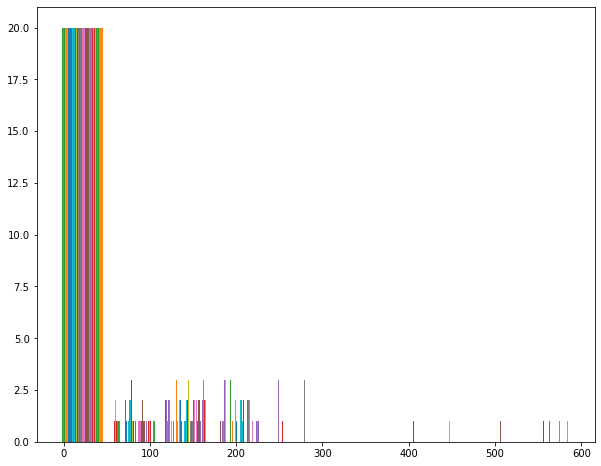

In [40]:
# Checking the distribution's shape
fig, ax1 = plt.subplots(figsize = (10, 8))
plt.hist(df);

As we can see, this is not a normal (gaussian) distribution. So, we we are going to use to standarize the data is MinMaxScaler()

In [9]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [41]:
# Splitting the data into X and y (features and labels). As explained before, 
# status is the objetive variable.
X = df.drop(["status"], axis = 1)
y = df["status"]

In [42]:
# Checking how many deceases there are: (values count will give you a pandas series)
print(f"The number of positive cases of Parkinson's decease is {y.value_counts()[1]} and the healthy ones are {y.value_counts()[0]}.")

The number of positive cases of Parkinson's decease is 147 and the healthy ones are 48.


In [43]:
# Standarizing the data:

# Creating the object
normalizer = MinMaxScaler()

# Fitting and transforming the data
X_normalized = normalizer.fit_transform(X)

# We don't do it on the "y" to have better results (not alter the results)

In [44]:
# Now, splitting the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# Gradient Boosting Algorithm – Working and Improvements

https://data-flair.training/blogs/gradient-boosting-algorithm/

In [45]:
# Training the model

# Creating the object
clf = XGBClassifier()

# Training
clf.fit(X_train, y_train)

XGBClassifier()

In [48]:
# Calculate the accuracy
y_pred = clf.predict(X_test)
print(f"The model's accuracy is:\n{np.around(accuracy_score(y_test, y_pred)*100, 2)}%")

The model's accuracy is:
94.87%
